<a href="https://colab.research.google.com/github/simran2195/bridge_health/blob/main/signal_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [7]:
!pip3 install ssqueezepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 KB 10.6 MB/s eta 0:00:00


In [27]:
!pip3 install synsq


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement synsq (from versions: none)
ERROR: No matching distribution found for synsq


In [33]:
!pip3 install scikit-cycling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 937.5/937.5 KB 11.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [35]:
from google.colab import files
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ssqueezepy as sp
from ssqueezepy import ssq_cwt, ssq_stft
import math

# for signal processing
import numpy as np
from scipy import signal
from scipy.signal import morlet2



In [10]:
import pandas as pd

df = pd.read_csv('/mlt_20170619_083708_300.csv')

# /mlt_20170619_083708_300.csv

In [11]:
df.columns

Index(['Timestamp', 'accelX', 'accelY', 'accelZ', 'gyroX(rad/s)',
       'gyroY(rad/s)', 'gyroZ(rad/s)', 'Roll(rads)', 'Pitch(rads)',
       'Yaw(rads)', 'Lat', 'Long', 'Speed(mph)', 'TrueHeading', 'Alt(feet)',
       'ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)',
       'RelativeAltitude(meters)', 'magX(µT)', 'magY(µT)', 'magZ(µT)',
       'calMagX', 'calMagY', 'calMagZ', 'Unnamed: 25'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# Timestamp, accelZ, Lat, Long

In [12]:
data = df.loc[:, ['Timestamp', 'accelZ', 'Lat', 'Long']]

In [7]:
data

,Timestamp,accelZ,Lat,Long
0,19-Jun-2017 08:37:08.426,-0.9599,37.806409,-122.474925
1,19-Jun-2017 08:37:08.438,-0.9727,37.806409,-122.474925
2,19-Jun-2017 08:37:08.440,-1.0595,37.806409,-122.474925
3,19-Jun-2017 08:37:08.447,-1.0595,37.806409,-122.474925
4,19-Jun-2017 08:37:08.460,-1.1648,37.806409,-122.474925
...,...,...,...,...
4418,19-Jun-2017 08:37:51.611,-0.9383,37.808680,-122.476939
4419,19-Jun-2017 08:37:51.621,-0.9828,37.808680,-122.476939
4420,19-Jun-2017 08:37:51.632,-0.9782,37.808680,-122.476939
4421,19-Jun-2017 08:37:51.641,-0.8945,37.808680,-122.476939


In [13]:
data.to_csv('/content/demo_data.csv', index=False)

# Upload csv to Azure IoT Hub

In [11]:
# !pip3 install azure
!pip3 install azure-iot-device

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62132 sha256=7c32d71a700f720164abad8ef362f0e0105c4f5ca1dabe52ef7af92941deb456
  Stored in directory: /root/.cache/pip/wheels/6a/48/01/c895c027e9b9367ec5470fbf371ee56e795a49ac6a19aa4c9f
Successfully built paho-mqtt
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [15]:
!pip3 install azure.storage.blob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 4.9 MB/s eta 0:00:00


In [12]:
!pip3 show azure 

In [13]:
from azure.iot.device import IoTHubDeviceClient


In [16]:
# read the CSV file into a pandas DataFrame
data_to_upload = pd.read_csv('/content/demo_data.csv')

In [ ]:
import os
from azure.iot.device import IoTHubDeviceClient
from azure.core.exceptions import AzureError
from azure.storage.blob import BlobClient

CONNECTION_STRING = "[Device Connection String]"
PATH_TO_FILE = '/content/demo_data.csv'

In [ ]:
# create a connection string for the IoT Hub device
connection_string = 'HostName=<my_iothub>.azure-devices.net;DeviceId=<my_device>;SharedAccessKey=<my_key>'

# create an instance of the IoT Hub device client
client = IoTHubDeviceClient.create_from_connection_string(connection_string)

# convert the DataFrame to JSON format and send to IoT Hub
json_data = df.to_json(orient='records')
client.send_message(json_data)

In [33]:
df

,Timestamp,accelZ,Lat,Long
0,19-Jun-2017 08:37:08.426,-0.9599,37.806409,-122.474925
1,19-Jun-2017 08:37:08.438,-0.9727,37.806409,-122.474925
2,19-Jun-2017 08:37:08.440,-1.0595,37.806409,-122.474925
3,19-Jun-2017 08:37:08.447,-1.0595,37.806409,-122.474925
4,19-Jun-2017 08:37:08.460,-1.1648,37.806409,-122.474925
...,...,...,...,...
4418,19-Jun-2017 08:37:51.611,-0.9383,37.808680,-122.476939
4419,19-Jun-2017 08:37:51.621,-0.9828,37.808680,-122.476939
4420,19-Jun-2017 08:37:51.632,-0.9782,37.808680,-122.476939
4421,19-Jun-2017 08:37:51.641,-0.8945,37.808680,-122.476939


# Coordinates of golden gates bridge
37.825651, -122.479387

37.811164, -122.477530



# Signal Processing

# Feature Extraction

The primary technical component of this project is its machine learning content, since it is necessary to produce any reliable results. The methodology of the paper [1] follows the following steps:

1.   The synchrosqueezed wavelet transform is calculated for each of the bridge crossings.
2.   The time variable is then remapped into linear location ‘r’ on the bridge, resulting in the space-frequency representation of the signal. Ridges are then identified as peaks at each location.

3.    Peaks from each individual location are first aggregated in spatial clusters, then among all datasets, resulting in one space-frequency diagram of identified ridge clusters. Each location in space represents one spatial segment from the synchrosqueezed wavelet transform from (1).

4. The most prominent vibration frequencies from each spatial group are selected and a histogram is created.

5. The modes of this histogram are identified using a kernel density (KDE) fit; these picks are considered in the MPMFs (Most Probably Modal Frequencies)









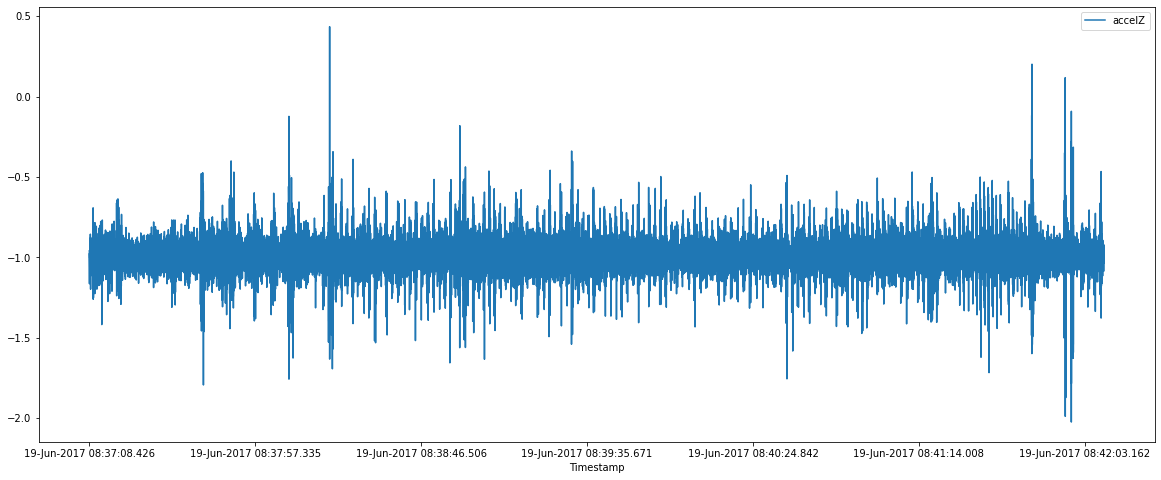

In [14]:
# Begin by visualizing the z-axis acceleration:
z_acc = data[["Timestamp", "accelZ"]]
z_acc.plot(x = "Timestamp", y = "accelZ", kind = "line", figsize=(20, 8), xlabel = None)
plt.show()

[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 82.76379103438657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 96.6743003584743, 0.0, 48.15530244741042, 0.0, 0.0, 0.0, 45.85153648279455, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

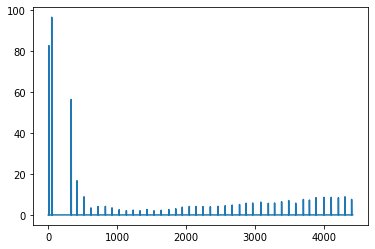

4423


In [26]:
# TODO: 
# 1. Morlet wavelet transform
# 2. Kernel density estimation
# 3. Wavelet Ridge Analysis


# Begin by visualizing the z-axis acceleration:
z_acc = data[["Timestamp", "accelZ"]]
# z_acc.plot(x = "Timestamp", y = "accelZ", kind = "line", figsize=(9, 8), xlabel = None)
# plt.show()

def get_bridge_coordinates(lat, lon):
        lat1 = lat[0]
        lon1 = lon[0]
        distances = []
        distances.append(0)
        R = 6371000                               # radius of Earth in meters
        
        for i in range(1, len(lat)):
            lat2 = lat[i]
            lon2 = lon[i]
            
            phi_1 = math.radians(lat1)
            phi_2 = math.radians(lat2)
            

            delta_phi = math.radians(lat2 - lat1)
            delta_lambda = math.radians(lon2-  lon1)
 
            a = math.sin(delta_phi / 2.0)**2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0)**2
            c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        
            meters = R * c                         # output distance in meters
            distances.append(meters)
            lat1 = lat2
            lon1 = lon2
#         self.km=self.meters/1000.0              # output distance in kilometers
#         self.miles=self.meters*0.000621371      # output distance in miles
#         self.feet=self.miles*5280               # output distance in feet
        return distances

coordinates = data[["Lat", "Long"]]
# display(coordinates)

latitudes = np.array(coordinates[["Lat"]])
longitudes = np.array(coordinates[["Long"]])

distances = get_bridge_coordinates(latitudes, longitudes)
print(distances)
plt.figure()
plt.plot(distances)
plt.show()
print(len(distances))

In [29]:
def viz(x, Tx, Wx):
    plt.imshow(np.abs(Tx), aspect='auto', cmap=plt.cm.nipy_spectral_r)
#     plt.show()
#     plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap = plt.cm.nipy_spectral_r)
    plt.show()

#%%# Define signal ####################################

N = 2048
t = np.linspace(0, 10, N, endpoint=False)
xo = np.cos(2 * np.pi * 2 * (np.exp(t / 2.2) - 1))
xo += xo[::-1]  # add self reflected
x = xo + np.sqrt(2) * np.random.randn(N)  # add noise

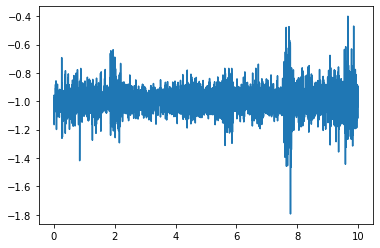

4423


In [30]:
z_acc_arr = np.array(z_acc["accelZ"])
t = np.linspace(0, 10, len(z_acc_arr), endpoint=False)

plt.figure()
plt.plot(t, z_acc_arr)
plt.show()

print(len(z_acc_arr))

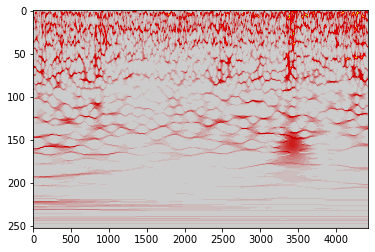

In [31]:
# Extract z_accel data as array
plt.figure()

# print(len(z_acc_arr), lSen(t))
# print(z_acc_arr)
# print(t)

Twz, Wz, *_ = ssq_cwt(z_acc_arr)
viz(z_acc_arr, Twz, Wz)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


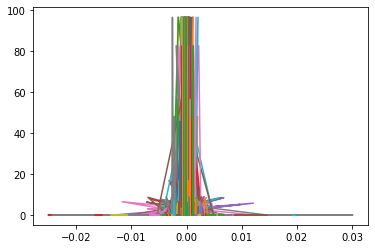

In [32]:
# Extract spatial coordinates from sampled dataset:
plt.figure()
plt.plot(np.transpose(Twz), distances)
plt.show()

In [34]:
from sklearn.neighbors import KernelDensity

# Feature Extraction

The primary technical component of this project is its machine learning content, since it is necessary to produce any reliable results. The methodology of the paper [1] follows the following steps:

1.   The synchrosqueezed wavelet transform is calculated for each of the bridge crossings.
2.   The time variable is then remapped into linear location ‘r’ on the bridge, resulting in the space-frequency representation of the signal. Ridges are then identified as peaks at each location.

3.    Peaks from each individual location are first aggregated in spatial clusters, then among all datasets, resulting in one space-frequency diagram of identified ridge clusters. Each location in space represents one spatial segment from the synchrosqueezed wavelet transform from (1).

4. The most prominent vibration frequencies from each spatial group are selected and a histogram is created.

5. The modes of this histogram are identified using a kernel density (KDE) fit; these picks are considered in the MPMFs (Most Probably Modal Frequencies)









In [21]:
# send data from segment of the bridge
# input: zaxis values for the segment
def data_processing(bridge_data):

  accelZ_original_data = data['accelZ']

  # resample the data at 100 Hz because there's sampling variation in data collection in the field
  accelZ_resampled_data = signal.resample(accelZ_original_data, len(original_data)*2)

  #  synchrosqueezed wavelet transform is calculated


  # apply KDE on signal with Gaussian Kernel and bandwidth 0.05 Hz
  # 1% of the frequency range considered
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
  kde.score_samples(X)


In [ ]:
data_processing(df)

# KDE test

In [1]:
from sklearn.neighbors import KernelDensity
import numpy as np

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [3]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [6]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)

In [5]:
kde.score_samples(X)

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

Resampling accelerometer data at 100 Hz involves changing the rate at which the data is sampled. If your accelerometer data is originally sampled at a different rate, such as 50 Hz, 200 Hz, or any other rate, you can resample it using a digital signal processing technique called resampling.

To resample accelerometer data at 100 Hz, you will need to follow these steps:

1. Determine the original sampling rate of the accelerometer data. Let's say the original sampling rate is 50 Hz.

2. Calculate the resampling factor. The resampling factor is the ratio of the new sampling rate to the original sampling rate. In this case, the resampling factor is 100/50, which is 2.

3. Use a digital signal processing library, such as scipy or numpy in Python, to resample the data. The resampling process involves applying a low-pass filter to the original data to prevent aliasing, and then interpolating the filtered data to obtain the resampled data. 

Note that resampling can introduce some artifacts or distortion in the data, especially if the resampling factor is large or if the original data contains high-frequency components. Therefore, it's important to carefully evaluate the resampled data to ensure that the resampling process did not introduce any significant errors.

In [18]:
original_data = data['accelZ']

In [19]:
# resample the data at 100 Hz
resampled_data = signal.resample(original_data, len(original_data)*2)


# For accelerometer data along z axis calculate synchrosqueezed wavelet transform

1. Load the accelerometer data along the z-axis. Let's assume that the data is stored in a NumPy array called z_data.

2. Choose a wavelet function and define its parameters. The wavelet function determines the shape and frequency content of the synchrosqueezed wavelet transform. Some common wavelet functions include the Morlet, Mexican hat, and Haar wavelets. For example, you can define a Morlet wavelet with a central frequency of 10 Hz and a bandwidth of 2 Hz as follows:

3. Choose a synchrosqueezing method and define its parameters. Synchrosqueezing is a post-processing technique that enhances the time-frequency representation of the wavelet transform by reassigning energy from the wavelet coefficients to their corresponding frequency components. Some common synchrosqueezing methods include the reassignment method and the Hermite projection method. For example, you can use the reassignment method with a frequency resolution of 0.1 Hz as follows:

4. Calculate the synchrosqueezed wavelet transform of the accelerometer data using the chosen wavelet function and synchrosqueezing method. You can use the sinsq.cwt function from the Synchrosqueezing Toolbox (synsq) library in Python to perform the calculation. The sinsq.cwt function takes as input the data to be transformed, the wavelet function, the frequency range of interest, and the synchrosqueezing method and parameters.

5. 



In [39]:
# step 1 -> resample the data at 100 Hz

accelZ_original_data = data['accelZ']
# resample the data at 100 Hz because there's sampling variation in data collection in the field
accelZ_resampled_data = signal.resample(accelZ_original_data, len(original_data))


# Plotting the accelerometer data

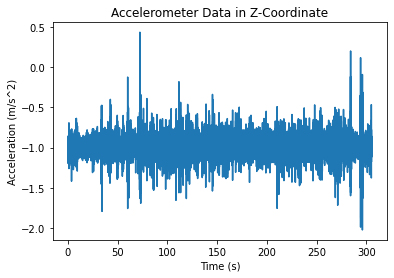

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example accelerometer data

fs = 100  # Sampling rate in Hz
n = len(accelZ_original_data) 
time = np.linspace(0, (n-1)/fs, n)


# Plot accelerometer data
fig, ax = plt.subplots()
ax.plot(time, accelZ_original_data)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (m/s^2)')
ax.set_title('Accelerometer Data in Z-Coordinate')
plt.show()


## Plotting 100Hz resampled data

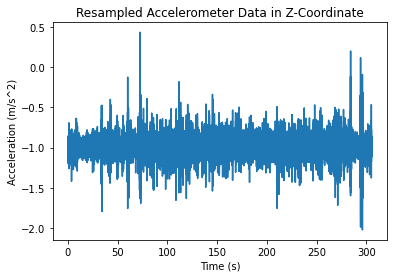

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example accelerometer data

fs = 100  # Sampling rate in Hz
n = len(accelZ_resampled_data) 
time = np.linspace(0, (n-1)/fs, n)


# Plot accelerometer data
fig, ax = plt.subplots()
ax.plot(time, accelZ_resampled_data)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (m/s^2)')
ax.set_title('Resampled Accelerometer Data in Z-Coordinate')
plt.show()

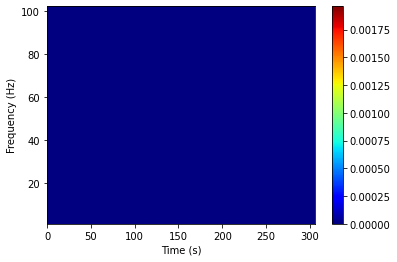

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import morlet2

# Generate sample data (replace with your own accelerometer data)
# time = np.linspace(0, 1, 1000)
acc_z = accelZ_resampled_data
fs = 100  # Sampling rate in Hz
n = len(accelZ_resampled_data) 
time = np.linspace(0, (n-1)/fs, n)


# Define Morlet wavelet parameters
frequencies = np.logspace(np.log10(1), np.log10(100), num=100)
scales = 1 / (2 * np.pi * frequencies)
w0 = 6

# Compute Morlet wavelet transform
morlet = np.zeros((len(frequencies), len(time)), dtype=np.complex128)
for i, scale in enumerate(scales):
    wavelet = morlet2(M=len(time), s=scale, w=6)
    morlet[i, :] = np.convolve(acc_z, wavelet, mode='same')

# Plot Morlet power spectrum
power = np.abs(morlet) ** 2
plt.pcolormesh(time, frequencies, power, cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()


In [45]:
Twz, Wz, *_ = ssq_cwt(accelZ_resampled_data)


In [46]:
def viz(x, Tx, Wx):
    plt.imshow(np.abs(Tx), aspect='auto', cmap=plt.cm.nipy_spectral_r)
#     plt.show()
#     plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap = plt.cm.nipy_spectral_r)
    plt.show()

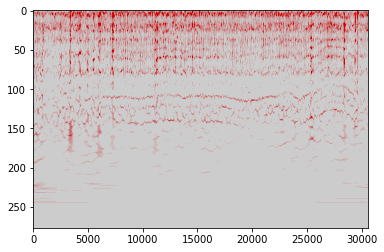

In [48]:
viz(accelZ_resampled_data, Twz, Wz)